In [ ]:
import os
import cv2

def preprocess_images(input_dir, output_dir, img_size=(128, 128)):
    """
    Preprocess images by resizing, normalizing, and saving to an output directory.
    
    Args:
        input_dir (str): Path to the directory containing raw images.
        output_dir (str): Path to save preprocessed images.
        img_size (tuple): Desired image size (width, height).
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    for class_name in os.listdir(input_dir):  # Iterate through class folders
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip non-folder files

        # Create class folder in output directory
        output_class_path = os.path.join(output_dir, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                # Read the image
                img = cv2.imread(img_path)

                # Resize the image
                img_resized = cv2.resize(img, img_size)

                # Normalize pixel values to [0, 1]
                img_normalized = img_resized / 255.0

                # Optional: Apply denoising filter (if noisy images)
                img_denoised = cv2.fastNlMeansDenoisingColored(
                    (img_normalized * 255).astype("uint8"), None, 10, 10, 7, 21
                )

                # Save the preprocessed image
                output_path = os.path.join(output_class_path, img_name)
                cv2.imwrite(output_path, (img_denoised * 255).astype("uint8"))
                print(f"Processed and saved: {output_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {e}")


# Define paths
input_directory = "D:/lofty intern/PADDY IMAGES/DAY 2/paddy_images_raw"  # Path to raw images
output_directory = "D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed"  # Path to save preprocessed images

# Run preprocessing
preprocess_images(input_directory, output_directory)


Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100023 - Copy (2).jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100023 - Copy.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100023.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100049 - Copy (2).jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100049 - Copy.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100049.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100126 - Copy (2).jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100126 - Copy.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100126.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed\sample 1\100133 

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [7]:
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)

Found 9962 images belonging to 10 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9907 images belonging to 10 classes.


In [10]:
# Define paths
train_dir = 'D:/lofty intern/PADDY IMAGES/DAY 2/paddy_images_raw'  # Replace with path to your training images
validation_dir = 'D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed'  # Replace with path to your validation images
img_size = (128, 128)  # Image size to match model input
batch_size = 32

In [11]:
# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (9 diseases + normal)
])

C:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

C:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.1264 - loss: 2.2886  

C:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


311/311 ━━━━━━━━━━━━━━━━━━━━ 164s 524ms/step - accuracy: 0.1265 - loss: 2.2884 - val_accuracy: 0.1008 - val_loss: 6.6827
Epoch 2/25
  1/311 ━━━━━━━━━━━━━━━━━━━━ 1:34 304ms/step - accuracy: 0.2500 - loss: 1.9939

C:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


311/311 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.2500 - loss: 1.9939 - val_accuracy: 0.1007 - val_loss: 6.5152
Epoch 3/25
311/311 ━━━━━━━━━━━━━━━━━━━━ 163s 525ms/step - accuracy: 0.2717 - loss: 2.0063 - val_accuracy: 0.0988 - val_loss: 4.5169
Epoch 4/25
311/311 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.4375 - loss: 1.6678 - val_accuracy: 0.0955 - val_loss: 4.6054
Epoch 5/25
311/311 ━━━━━━━━━━━━━━━━━━━━ 159s 512ms/step - accuracy: 0.3687 - loss: 1.7915 - val_accuracy: 0.0930 - val_loss: 5.4064
Epoch 6/25
311/311 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.4062 - loss: 1.6388 - val_accuracy: 0.0924 - val_loss: 5.5750
Epoch 7/25
311/311 ━━━━━━━━━━━━━━━━━━━━ 161s 517ms/step - accuracy: 0.4324 - loss: 1.6270 - val_accuracy: 0.0877 - val_loss: 6.5821
Epoch 8/25
311/311 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.3438 - loss: 1.8383 - val_accuracy: 0.0831 - val_loss: 6.4775
Epoch 9/25
311/311 ━━━━━━━━━━━━━━━━━━━━ 161s 519ms/step - accuracy: 0.4614 - loss: 1.5618 - val

In [14]:
# Save the Model
model.save('disease_classifier_model.h5')

In [15]:
# Evaluate the Model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy:.2f}, Validation Loss: {validation_loss:.2f}")

310/310 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.1044 - loss: 8.4536 
Validation Accuracy: 0.10, Validation Loss: 8.52


In [16]:
# Prediction function
def predict_disease(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Predict the class
    prediction = model.predict(img_array)

    
    # Get the predicted class index
    predicted_class_idx = np.argmax(prediction, axis=-1)
    
    # Class labels (9 diseases + normal)
    class_labels = ['bacterial_leaf_blight',
'bacterial_leaf_streak',
'bacterial_panicle_blight',
'blast',
'brown_spot',
'dead_heart',
'downy_mildew',
'hispa',
'normal',
'tungro']
    # Output the result
    print(f"Predicted class: {class_labels[predicted_class_idx[0]]}")

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class: normal


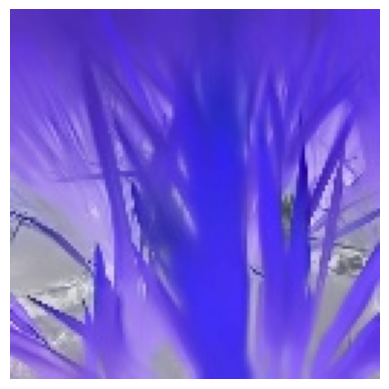

In [18]:
# Example usage"C:\Users\Nandan\Desktop\5g"
img_path = "D:/lofty intern/PADDY IMAGES/DAY 2/paddy_preprocessed/sample 7/100019.jpg"  # Replace with the actual test image path
predict_disease(img_path)